## Reference

[1.] [Python 使用 Beautiful Soup 抓取與解析網頁資料，開發網路爬蟲教學](https://blog.gtwang.org/programming/python-beautiful-soup-module-scrape-web-pages-tutorial/)

[2.] [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

[3.] [python 3 筆記 - 利用 urllib 來存取網頁](http://beanobody.blogspot.com/2015/12/python-3-urllib.html)

[4.] [開始使用Python撰寫網路爬蟲 ( Crawler )](https://www.largitdata.com/course/5/)
***

# Intruduce the Web Crawler


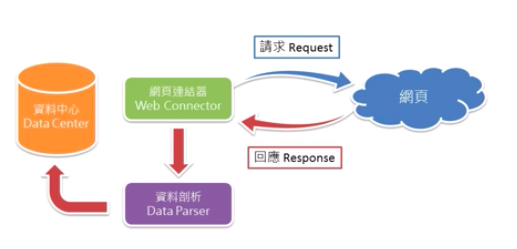

In [2]:
%matplotlib inline
from PIL import Image
Image.open("./dataset/induction_crawler.png")



## 使用  Python 元件

 - **Requests**
     - 網路資源(URLs)擷取套件
     
 - **BeautifulSoup4**
     - HTML剖析套件


***
## Beautiful Soup 基本用法


[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) 是一個 Python 的函式庫模組，可以讓開發者僅須撰寫非常少量的程式碼，就可以快速解析網頁 HTML 碼，從中翠取出使用者有興趣的資料、去蕪存菁，降低網路爬蟲程式的開發門檻、加快程式撰寫速度。

***
Beautiful Soup 的運作方式就是讀取 HTML 原始碼，自動進行解析並產生一個 BeautifulSoup 物件，此物件中包含了整個 HTML 文件的結構樹，有了這個結構樹之後，就可以輕鬆找出任何有興趣的資料了。


***

以下是一個簡單的小程式，示範如何使用 **Beautiful Soup** 模組解析原始的 **HTML** 程式碼

In [3]:
# 引入 Beautiful Soup 模組
from bs4 import BeautifulSoup

# 原始 HTML 程式碼
html_doc = """
<html><head><title>Hello World</title></head>
<body><h2>Test Header</h2>
<p>This is a test.</p>
<a id="link1" href="/my_link1">Link 1</a>
<a id="link2" href="/my_link2">Link 2</a>
<p>Hello, <b class="boldtext">Bold Text</b></p>
</body></html>
"""

# 以 Beautiful Soup 解析 HTML 程式碼
soup = BeautifulSoup(html_doc, 'html.parser')

這裡的 **soup** 就是解析完成後，所產生的結構樹物件，接下來所有資料的搜尋、萃取等操作都會透過這個物件來進行。

***

首先我們可以將完整個 **HTML** 結構經過排版後輸出，觀察整份文件的輪廓：

In [4]:
# 輸出排版後的 HTML 程式碼
print(soup.prettify())

<html>
 <head>
  <title>
   Hello World
  </title>
 </head>
 <body>
  <h2>
   Test Header
  </h2>
  <p>
   This is a test.
  </p>
  <a href="/my_link1" id="link1">
   Link 1
  </a>
  <a href="/my_link2" id="link2">
   Link 2
  </a>
  <p>
   Hello,
   <b class="boldtext">
    Bold Text
   </b>
  </p>
 </body>
</html>



## 取得節點文字內容
若要輸出網頁標題的 HTML 標籤，可以直接指定網頁標題標籤的名稱（**title**），即可將該標籤的節點抓出來：

In [5]:
# 網頁標題 HTML 標籤
title_tag = soup.title
print(title_tag)

<title>Hello World</title>


#### HTML 標籤節點的文字內容，可以透過 **string** 屬性存取：

In [6]:
print(title_tag.string)

Hello World


## 搜尋節點
 - 我們可以使用 **find_all** 找出所有特定的 HTML 標籤節點
 - 再以 Python 的迴圈來依序輸出每個超連結的文字

In [7]:
# 所有的超連結
a_tags = soup.find_all('a')
a_tags

[<a href="/my_link1" id="link1">Link 1</a>,
 <a href="/my_link2" id="link2">Link 2</a>]

## 取出節點屬性
 - 若要取出 HTML 節點的各種屬性，可以使用 **get**
 - 例如輸出每個超連結的網址（href 屬性）

In [8]:
for tag in a_tags:
  # 輸出超連結的文字
  print(tag.string)

Link 1
Link 2


In [9]:
for tag in a_tags:
  # 輸出超連結網址
  print(tag.get('href'))

/my_link1
/my_link2


## 同時搜尋多種標籤
若要同時搜尋多種 HTML 標籤，可以使用 list 來指定所有的要列出的 HTML 標籤名稱：

In [10]:
# 搜尋所有超連結與粗體字
tags = soup.find_all(["a", "b"]) # 可以使用 list 
print(tags)

[<a href="/my_link1" id="link1">Link 1</a>, <a href="/my_link2" id="link2">Link 2</a>, <b class="boldtext">Bold Text</b>]


## 限制搜尋節點數量
 - **find_all** 預設會輸出所有符合條件的節點，
 - 但若是遇到節點數量很多的時候，就會需要比較久的計算時間
 - 如果我們不需要所有符合條件的節點，可以用 **limit** 參數指定搜尋節點數量的上限值

In [11]:
# 限制搜尋結果數量
tags = soup.find_all(["a", "b"], limit=2)
print(tags)

[<a href="/my_link1" id="link1">Link 1</a>, <a href="/my_link2" id="link2">Link 2</a>]


如果只需要抓出第一個符合條件的節點，可以直接使用 find

In [12]:
# 只抓出第一個符合條件的節點
a_tag = soup.find("a")
print(a_tag)

<a href="/my_link1" id="link1">Link 1</a>


## 遞迴搜尋

預設的狀況下，find_all 會以遞迴的方式尋找所有的子節點

In [13]:
# 預設會以遞迴搜尋
soup.html.find_all("title")

[<title>Hello World</title>]

如果想要限制 find_all 只找尋次一層的子節點，可以加上 recursive=False 關閉遞迴搜尋功能

In [14]:
# 不使用遞迴搜尋，僅尋找次一層的子節點
soup.html.find_all("title", recursive=False)

[]

## 以 HTML 屬性搜尋
 - 我們也可以根據網頁 HTML 元素的屬性來萃取指定的 HTML 節點
 - 例如搜尋 id 屬性為 link2 的節點

In [15]:
# 根據 id 搜尋
link2_tag = soup.find(id='link2')
print(link2_tag)

<a href="/my_link2" id="link2">Link 2</a>


 - 我們可以結合 HTML 節點的名稱與屬性進行更精確的搜尋
 - 例如搜尋 href 屬性為 **/my_link1** 的 a 節點

In [16]:
# 搜尋 href 屬性為 /my_link1 的 a 節點
a_tag = soup.find_all("a", href="/my_link1")
print(a_tag)

[<a href="/my_link1" id="link1">Link 1</a>]


## 正規表示法搜尋屬性

 - 搜尋屬性時，也可以使用**正規表示法**
 - 例如以正規表示法比對超連結網址

In [17]:
import re

# 以正規表示法比對超連結網址
links = soup.find_all(href = re.compile("^/my_link\d"))
print(links)

[<a href="/my_link1" id="link1">Link 1</a>, <a href="/my_link2" id="link2">Link 2</a>]


我們也可以同時使用多個屬性的條件進行篩選：

In [18]:
# 以多個屬性條件來篩選
link = soup.find_all(href = re.compile("^/my_link\d"), id="link1")
print(link)

[<a href="/my_link1" id="link1">Link 1</a>]


在 **HTML5** 中有一些屬性名稱若直接寫在 Python 的參數中會有一些問題，例如 data-* 這類的屬性直接寫的話，就會產生錯誤訊息：

In [19]:
data_soup = BeautifulSoup('<div data-foo="value">foo!</div>', 'html.parser')

# 錯誤的用法
data_soup.find_all(data-foo="value")


SyntaxError: keyword can't be an expression (<ipython-input-19-ee1f74febb50>, line 4)

 - 遇到這種狀況，可以**把屬性的名稱與值放進一個 dictionary** 中
 - 再將此 dictionary 指定給 attrs 參數即可：

In [20]:
# 正確的用法
data_soup.find_all(attrs={"data-foo": "value"})

NameError: name 'data_soup' is not defined

In [21]:
data_soup

NameError: name 'data_soup' is not defined

***
# 以 CSS 搜尋
由於 class 是 Python 程式語言的保留字，所以 Beautiful Soup 改以 class_ 這個名稱代表 HTML 節點的 class 屬性，例如搜尋 class 為 boldtext 的 b 節點：

In [22]:
# 搜尋 class 為 boldtext 的 b 節點
b_tag = soup.find_all("b", class_="boldtext")
print(b_tag)

[<b class="boldtext">Bold Text</b>]


CSS 的 class 屬性也可以使用正規表示法搜尋：



In [23]:
# 以正規表示法搜尋 class 屬性
b_tag = soup.find_all(class_=re.compile("^bold"))
print(b_tag)

[<b class="boldtext">Bold Text</b>]


一個 HTML 標籤元素可以同時有多個 CSS 的 class 屬性值，而我們在以 class_ 比對時，只要其中一個 class 符合就算比對成功，例如：



In [24]:
css_soup = BeautifulSoup('<p class="body strikeout"></p>', 'html.parser')

# 只要其中一個 class 符合就算比對成功
p_tag = css_soup.find_all("p", class_="strikeout")
print(p_tag)

[<p class="body strikeout"></p>]


也可拿完整的 class 字串來進行比對：

In [25]:
# 比對完整的 class 字串
p_tag = css_soup.find_all("p", class_="body strikeout")
print(p_tag)

[<p class="body strikeout"></p>]


不過如果多個 class 名稱排列順序不同時，就會失敗：

In [26]:
# 若順序不同，則會失敗
p_tag = css_soup.find_all("p", class_="strikeout body")
print(p_tag)

[]


遇到多個 CSS class 的狀況，建議改用 CSS 選擇器來篩選：

In [27]:
# 使用 CSS 選擇器
p_tag = css_soup.select("p.strikeout.body")
print(p_tag)


[<p class="body strikeout"></p>]


## 以文字內容搜尋
若要依據文字內容來搜尋特定的節點，可以使用 find_all 配合 string 參數：

In [28]:
links_html = """
<a id="link1" href="/my_link1">Link One</a>
<a id="link2" href="/my_link2">Link Two</a>
<a id="link3" href="/my_link3">Link Three</a>
"""
soup = BeautifulSoup(links_html, 'html.parser')

# 搜尋文字為「Link One」的超連結
soup.find_all("a", string="Link One")

[<a href="/my_link1" id="link1">Link One</a>]

亦可使用正規表示法批配文字內容：

In [29]:
# 以正規表示法搜尋文字為「Link」開頭的超連結
soup.find_all("a", string=re.compile("^Link"))

[<a href="/my_link1" id="link1">Link One</a>,
 <a href="/my_link2" id="link2">Link Two</a>,
 <a href="/my_link3" id="link3">Link Three</a>]

## 向上、向前與向後搜尋
 - 前面介紹的 find_all 都是向下搜尋子節點
 
 
 - 如果需要向上搜尋父節點的話，
 - 可以改用 **find_parents 或是 find_parent**
 - 它可讓我們以某個特定節點為起始點，向上搜尋父節點：

In [30]:
html_doc = """
<body><p class="my_par">
<a id="link1" href="/my_link1">Link 1</a>
<a id="link2" href="/my_link2">Link 2</a>
<a id="link3" href="/my_link3">Link 3</a>
<a id="link3" href="/my_link4">Link 4</a>
</p></body>
"""
soup = BeautifulSoup(html_doc, 'html.parser')
link2_tag = soup.find(id="link2")

# 往上層尋找 p 節點
p_tag = link2_tag.find_parents("p")
print(p_tag)

[<p class="my_par">
<a href="/my_link1" id="link1">Link 1</a>
<a href="/my_link2" id="link2">Link 2</a>
<a href="/my_link3" id="link3">Link 3</a>
<a href="/my_link4" id="link3">Link 4</a>
</p>]


 - 如果想要在在同一層往前尋找特定節點，
 - 則可用 **find_previous_siblings** 函數
 - 或是 **find_previous_sibling**

In [31]:
# 在同一層往前尋找 a 節點
link_tag = link2_tag.find_previous_siblings("a")
print(link_tag)

[<a href="/my_link1" id="link1">Link 1</a>]


 - 如果想要在在同一層往後尋找特定節點，
 - 則可用 **find_next_siblings** 函數
 - 或是 **find_next_sibling**

In [32]:
# 在同一層往後尋找 a 節點
link_tag = link2_tag.find_next_siblings("a")
print(link_tag)

[<a href="/my_link3" id="link3">Link 3</a>, <a href="/my_link4" id="link3">Link 4</a>]


## 網頁檔案
如果我們想要用 Beautiful Soup 解析已經下載的 HTML 檔案，可以直接將開啟的檔案交給 BeautifulSoup 處理：

In [96]:
from bs4 import BeautifulSoup
# 從檔案讀取 HTML 程式碼進行解析
with open("https://www.google.com/search?q=python") as f:
    soup = BeautifulSoup(f)

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.google.com/search?q=python'